# Plotting Game History

There is a desire to show in the viewer, along with an overlay of powers and threats present in the game, a historical plot of Powers,Threats, and other features that each  player has. This is intended to help a viewer to better understand the strategic progression of the game and perhaps notice when mistakes are made.

In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns

from FIAR import FIAR
from FIAR_Saves import RECORDS_FOLDER
from FIAR_Analyzer import FIAR_Analyzer

We will first load a record game and tally up all recognized features for each player for each game state

In [2]:
game = FIAR.from_csv('Assy_Lassie',RECORDS_FOLDER)
## Analysis
analysis = FIAR_Analyzer(game)
analysis.update_PoT_History()
df = analysis.PoT_History
display(df)

,marker,SPoTs,HPoTs,softPower,hardPower,softThreat,hardThreat,player
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,red
1,1.0,4.0,0.0,0.0,0.0,0.0,0.0,black
2,2.0,3.0,0.0,0.0,0.0,0.0,0.0,red
3,2.0,3.0,0.0,0.0,0.0,0.0,0.0,black
4,3.0,3.0,0.0,0.0,0.0,0.0,0.0,red
5,3.0,6.0,0.0,0.0,0.0,0.0,0.0,black
6,4.0,4.0,0.0,1.0,0.0,0.0,0.0,red
7,4.0,5.0,0.0,0.0,0.0,0.0,0.0,black
8,5.0,4.0,1.0,0.0,0.0,0.0,0.0,red
9,5.0,6.0,0.0,1.0,0.0,0.0,0.0,black


Not all features are equally important, and some can be bunched for clarity.

In [3]:
df_sum = pd.DataFrame()
df_sum['marker'] = df['marker']
df_sum['powers'] = df['softPower'] + df['hardPower']
df_sum['threats'] = df['softThreat'] + df['hardThreat']
df_sum['player'] = df['player']
df_sum.set_index('marker')
display(df_sum)

,marker,powers,threats,player
0,1.0,0.0,0.0,red
1,1.0,0.0,0.0,black
2,2.0,0.0,0.0,red
3,2.0,0.0,0.0,black
4,3.0,0.0,0.0,red
5,3.0,0.0,0.0,black
6,4.0,1.0,0.0,red
7,4.0,0.0,0.0,black
8,5.0,0.0,0.0,red
9,5.0,1.0,0.0,black


By restructuring the data, we can plot different information for both players across time on the same plot.

<AxesSubplot:xlabel='marker', ylabel='count'>

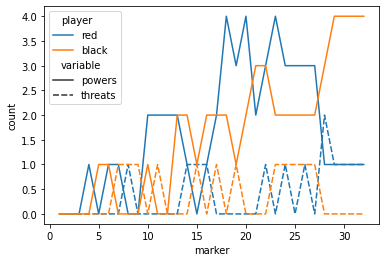

In [4]:
df_sum_melt = pd.melt(df_sum, 
        id_vars = ['marker','player'],
        value_vars = ['powers','threats'],
        value_name = 'count')

sns.lineplot(data=df_sum_melt, x = 'marker', y='count', hue='player', style='variable')

The above plot is of dubious value, and several changes might help:
    1. Modifying the lines to be drawn as step-changes instead of sloped lines.
    1. Changing the colors of lines to correspond to the player colors
These changes are difficult to implement within seaborn, and so I will transition to using matplotlib to perform that. Matplotlib will require me to restructure the format of my data again.

In order to plot the numbers of powers as step_changes, we will need to add data points between each existing data point. These data points will have the same value for the independent variable as the previous data point, and the same values for the dependent variables as the next data point.

In [23]:
df_black = df_sum[df_sum.player == "black"]
df_red = df_sum[df_sum.player == "red"]

display(df_black.head())


,marker,powers,threats,player
1,1.0,0.0,0.0,black
3,2.0,0.0,0.0,black
5,3.0,0.0,0.0,black
7,4.0,0.0,0.0,black
9,5.0,1.0,0.0,black


In [39]:
df_black_bfill = pd.DataFrame({'marker':[],
                               'powers':[],
                               'threats':[],
                               'player':[]})
for row_i in range(df_black.shape[0]-1):
    prev_row = df_black.iloc[row_i, :]
    df_black_bfill = df_black_bfill.append(prev_row)
    next_row = df_black.iloc[row_i+1,:]
    new_row = prev_row.copy()
    new_row.marker = next_row.marker
    new_row.powers = prev_row.powers
    new_row.threats = prev_row.threats
    new_row.player = next_row.player
    df_black_bfill = df_black_bfill.append(new_row)
    
df_black_bfill.reset_index()
print(df_black_bfill)

    marker  powers  threats player
1      1.0     0.0      0.0  black
1      2.0     0.0      0.0  black
3      2.0     0.0      0.0  black
3      3.0     0.0      0.0  black
5      3.0     0.0      0.0  black
5      4.0     0.0      0.0  black
7      4.0     0.0      0.0  black
7      5.0     0.0      0.0  black
9      5.0     1.0      0.0  black
9      6.0     1.0      0.0  black
11     6.0     1.0      0.0  black
11     7.0     1.0      0.0  black
13     7.0     0.0      1.0  black
13     8.0     0.0      1.0  black
15     8.0     0.0      1.0  black
15     9.0     0.0      1.0  black
17     9.0     0.0      1.0  black
17    10.0     0.0      1.0  black
19    10.0     1.0      0.0  black
19    11.0     1.0      0.0  black
21    11.0     0.0      1.0  black
21    12.0     0.0      1.0  black
23    12.0     0.0      0.0  black
23    13.0     0.0      0.0  black
25    13.0     2.0      0.0  black
25    14.0     2.0      0.0  black
27    14.0     2.0      0.0  black
27    15.0     2.0  

In [80]:
def stepify_df(df, indeps, deps):
    stepped_df = df.iloc[0:0,:]
    for row_i in range(df.shape[0]-1):
        prev_row = df.iloc[row_i,:]
        stepped_df = stepped_df.append(prev_row)
        next_row = df.iloc[row_i+1,:]
        new_row = pd.Series()
        for indep in indeps:
            new_row[indep] = next_row[indep]
        for dep in deps:
            new_row[dep] = prev_row[dep]
        stepped_df = stepped_df.append(new_row, ignore_index=True)
    return stepped_df
        
df_black_bfill = stepify_df(df_black,['marker'],['powers','threats','player'])  
df_red_bfill = stepify_df(df_red,['marker'],['powers','threats','player'])  
display(df_black_bfill)

<ipython-input-80-c7fd73037999>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_row = pd.Series()


,marker,powers,threats,player
0,1.0,0.0,0.0,black
1,2.0,0.0,0.0,black
2,2.0,0.0,0.0,black
3,3.0,0.0,0.0,black
4,3.0,0.0,0.0,black
5,4.0,0.0,0.0,black
6,4.0,0.0,0.0,black
7,5.0,0.0,0.0,black
8,5.0,1.0,0.0,black
9,6.0,1.0,0.0,black


In [71]:
df_black_bfill_melt = pd.melt(df_black_bfill, 
        id_vars = ['marker','player'],
        value_vars = ['powers','threats'],
        value_name = 'count')
display(df_black_bfill_melt)

,marker,player,variable,count
0,1.0,black,powers,0.0
1,2.0,black,powers,0.0
2,2.0,black,powers,0.0
3,3.0,black,powers,0.0
4,3.0,black,powers,0.0
5,4.0,black,powers,0.0
6,4.0,black,powers,0.0
7,5.0,black,powers,0.0
8,5.0,black,powers,1.0
9,6.0,black,powers,1.0


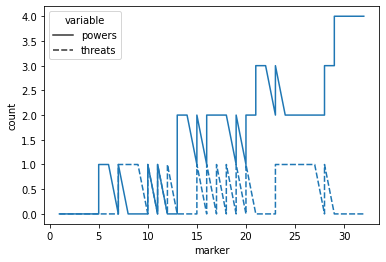

In [72]:
ax = sns.lineplot(data=df_black_bfill_melt, x = 'marker',y='count', style='variable', estimator=None)

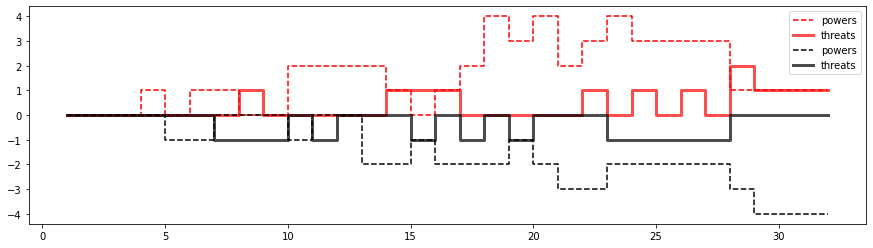

In [111]:
from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import Figure
fig = Figure(figsize=(15,4))
ax = fig.add_subplot(111)

black_data = df_black_bfill
red_data = df_red_bfill
ax.plot(red_data['marker'],red_data['powers'],color='red',linestyle = '--')
ax.plot(red_data['marker'],red_data['threats'],color='red',linestyle = '-',alpha=0.7, linewidth=3)
ax.plot(black_data['marker'],-black_data['powers'],color='black',linestyle = '--')
ax.plot(black_data['marker'],-black_data['threats'], color = 'black', linestyle = '-',alpha=0.7, linewidth=3)
ax.legend(['powers','threats']*2)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
display(fig)